# Label Propagation
在sklearn中，基于图算法的半监督学习有Label Propagation和Label Spreading两种。他们的主要区别是第二种方法带有正则化机制。

1. Label Propagation（标签传播）

基本原理：Label Propagation算法基于图理论。算法首先构建一个图，其中每个节点代表一个数据点，无论是标记的还是未标记的。节点之间的边代表数据点之间的相似性。算法的目的是通过图传播标签信息，使未标记数据获得标签。  

关键特点：  
相似性度量：通常使用K近邻（KNN）或者基于核的方法来定义数据点之间的相似性。  
标签传播：标签信息从标记数据点传播到未标记数据点，通过迭代过程实现。  
适用场景：适合于数据量较大、标记数据稀缺的情况。  


2. Label Spreading（标签扩散）

基本原理：Label Spreading和Label Propagation非常相似，但在处理标签信息和正则化方面有所不同。它同样基于构建图来传播标签。 

关键特点：  
正则化机制：Label Spreading引入了正则化参数，可以控制标签传播的过程，使算法更加健壮。  
稳定性：由于正则化的存在，Label Spreading在面对噪声数据时通常比Label Propagation更稳定。  
适用场景：同样适用于有大量未标记数据的情况，尤其当数据包含噪声或者不完全标记时。  

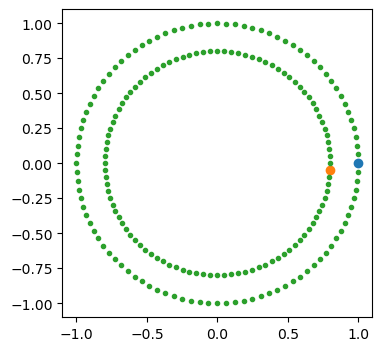

In [1]:
# 生成环形数据
import numpy as np
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, shuffle=False)
outer, inner = 0, 1
labels = np.full(200, -1.0)
labels[0] = outer
labels[-1] = inner

# 画图
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.scatter(X[labels == outer, 0], X[labels == outer, 1],)   # 标签为outer的数据点的x坐标和y坐标
plt.scatter(X[labels == inner, 0], X[labels == inner, 1],)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], marker=".",);

## Label Propagation

In [2]:
# Label Propagation
from sklearn.semi_supervised import LabelPropagation

label_propagation = LabelPropagation(kernel="knn")
label_propagation.fit(X, labels)

LabelPropagation(kernel='knn')

In [5]:
?LabelPropagation
LabelPropagation(
    kernel='rbf',
    *,
    gamma=20,    rbf函数的系数，简单理解为正态分布的方差
    n_neighbors=7,   K值
    max_iter=1000,
    tol=0.001,
    n_jobs=None,
)

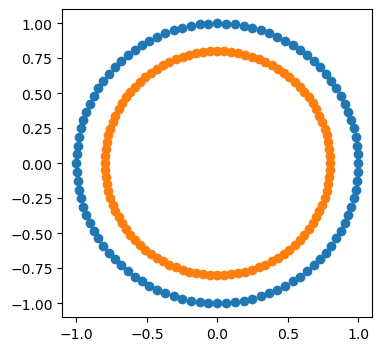

In [3]:
# Label Propagation打标签后的结果
output= np.asarray(label_propagation.transduction_)
outer_numbers = np.where(output == outer)[0]
inner_numbers = np.where(output == inner)[0]

plt.figure(figsize=(4, 4))
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1],)
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1],);

## Label Spreading

In [6]:
# Label Spreading
from sklearn.semi_supervised import LabelSpreading

label_spread = LabelSpreading(kernel="knn", alpha=0.8)  # 正则
label_spread.fit(X, labels)

LabelSpreading(alpha=0.8, kernel='knn')

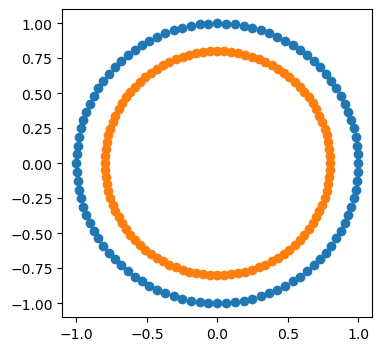

In [7]:
# Label Spreading打标签后的结果
output= np.asarray(label_spread.transduction_)
outer_numbers = np.where(output == outer)[0]
inner_numbers = np.where(output == inner)[0]

plt.figure(figsize=(4, 4))
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1],)
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1],)